In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
import numpy as np
import nltk

In [0]:
df = pd.read_csv('/content/drive/My Drive/Twitter Sentiment Analysis/train.csv', 
                 encoding='latin-1', index_col='ItemID')

In [8]:
df.head(10)

,Sentiment,SentimentText
ItemID,,
1,0,is so sad for my APL frie...
2,0,I missed the New Moon trail...
3,1,omg its already 7:30 :O
4,0,.. Omgaga. Im sooo im gunna CRy. I'...
5,0,i think mi bf is cheating on me!!! ...
6,0,or i just worry too much?
7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,0,Sunny Again Work Tomorrow :-| ...
9,1,handed in my uniform today . i miss you ...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99989 entries, 1 to 100000
Data columns (total 2 columns):
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [11]:
df.shape

(99989, 2)

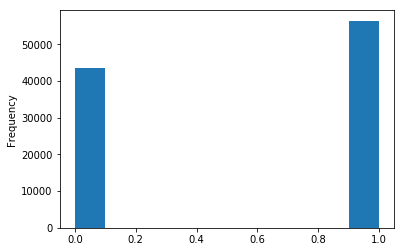

In [12]:
df['Sentiment'].plot(kind='hist')

In [0]:
train_df = df.copy()

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Removing Stopwords

In [0]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

train_df['SentimentText'] = train_df['SentimentText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [20]:
print(df.head())
print('-'*10+'After Stopwords removal'+ '-'*10)
print(train_df.head())

        Sentiment                                      SentimentText
ItemID                                                              
1               0                       is so sad for my APL frie...
2               0                     I missed the New Moon trail...
3               1                            omg its already 7:30 :O
4               0            .. Omgaga. Im sooo  im gunna CRy. I'...
5               0           i think mi bf is cheating on me!!!   ...
----------After Stopwords removal----------
        Sentiment                                      SentimentText
ItemID                                                              
1               0                        sad APL friend.............
2               0                       I missed New Moon trailer...
3               1                                omg already 7:30 :O
4               0  .. Omgaga. Im sooo im gunna CRy. I've dentist ...
5               0                     think mi bf cheating 

##Replacing abbreviations and some spell correction

In [0]:
import csv, re

In [0]:
# Code From: https://medium.com/nerd-stuff/python-script-to-turn-text-message-abbreviations-into-actual-phrases-d5db6f489222
def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "/content/drive/My Drive/sms_slang_translator-master/slang.txt"

        # File Access mode [Read Mode]
        with open(fileName, "r") as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9]+', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    return ' '.join(user_string)

In [0]:
train_df['SentimentText'] = train_df['SentimentText'].apply(lambda x: translator(x))

In [26]:
print(train_df.head())

        Sentiment                                      SentimentText
ItemID                                                              
1               0                        sad APL friend.............
2               0                       I missed New Moon trailer...
3               1                                omg already 7:30 :O
4               0  .. Omgaga. Im sooo im gunna CRy. I've dentist ...
5               0                     think mi bf cheating me!!! T_T


##Lemmatization

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()

train_df['SentimentText'] = train_df['SentimentText'].apply(lambda x: ' '.join([lmtzr.lemmatize(word, 'v') for word in x.split()]))
train_df.head()

,Sentiment,SentimentText
ItemID,,
1,0,sad APL friend.............
2,0,I miss New Moon trailer...
3,1,omg already 7:30 :O
4,0,.. Omgaga. Im sooo im gunna CRy. I've dentist ...
5,0,think mi bf cheat me!!! T_T


##Parts of Speech Tagging

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [35]:
train_df['SentimentText'] = train_df['SentimentText'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
print(train_df.head())

        Sentiment                                      SentimentText
ItemID                                                              
1               0  [(sad, JJ), (APL, NNP), (friend, NN), (..., :)...
2               0  [(I, PRP), (miss, VBP), (New, NNP), (Moon, NNP...
3               1  [(omg, NNS), (already, RB), (7:30, CD), (:, :)...
4               0  [(.., JJ), (Omgaga, NNP), (., .), (Im, NNP), (...
5               0  [(think, VB), (mi, NNS), (bf, VBP), (cheat, VB...


Here we have marked up every text in the corpus as corresponding to a particular part of speech.

Now all cleaning has been completed and our data can be transformed and feeded into a classfier for identifyig the sentiment of the crowd.
